In [8]:
'''
Typical steps to follow while building a supervised machine learning model on a given dataset:
o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.
o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.
o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.
o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.
'''

'\nTypical steps to follow while building a supervised machine learning model on a given dataset:\no Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.\no Fit the desired supervised machine learning model on the Train set to predict response using the predictors.\no Predict response using the predictors on the Test set using the machine learning model fit on the Train data.\no Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.\n'

In [38]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [39]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [41]:
print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [42]:
SalePrice = pd.DataFrame(data['SalePrice'])  # Response
GrLivArea = pd.DataFrame(data['GrLivArea'])        # Predictor

In [43]:
# Train Set : 600 samples
GrLivArea_Train = pd.DataFrame(GrLivArea[:600])
SalePrice_Train = pd.DataFrame(SalePrice[:600])

# Test Set : 200 samples
GrLivArea_Test = pd.DataFrame(GrLivArea[-200:])
SalePrice_Test = pd.DataFrame(SalePrice[-200:])

# Check the sample sizes
print("Train Set :", GrLivArea_Train.shape, SalePrice_Train.shape)
print("Test Set  :", GrLivArea_Test.shape, SalePrice_Test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [44]:
GrLivArea_Train.describe()
SalePrice_Train.describe()

,SalePrice
count,600.000000
mean,182517.893333
std,78553.612201
min,34900.000000
25%,128425.000000
50%,164800.000000
75%,216625.000000
max,555000.000000


In [48]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [49]:
linreg.fit(GrLivArea_Train, SalePrice_Train)

LinearRegression()

In [50]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [11868.59517953]
Coefficients 	: a =  [[112.70464623]]


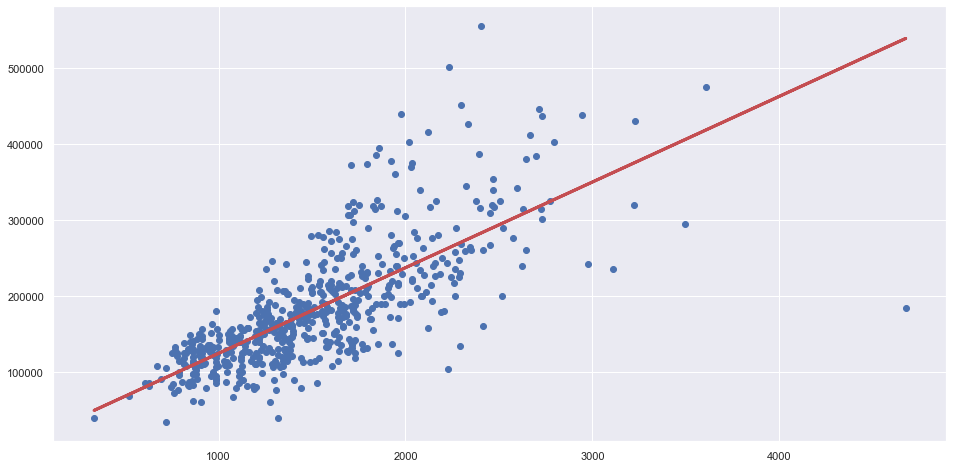

In [51]:
regline_x = GrLivArea_Train
regline_y = linreg.intercept_ + linreg.coef_ * GrLivArea_Train #GrLivArea_Train is coefficient

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_Train, SalePrice_Train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()



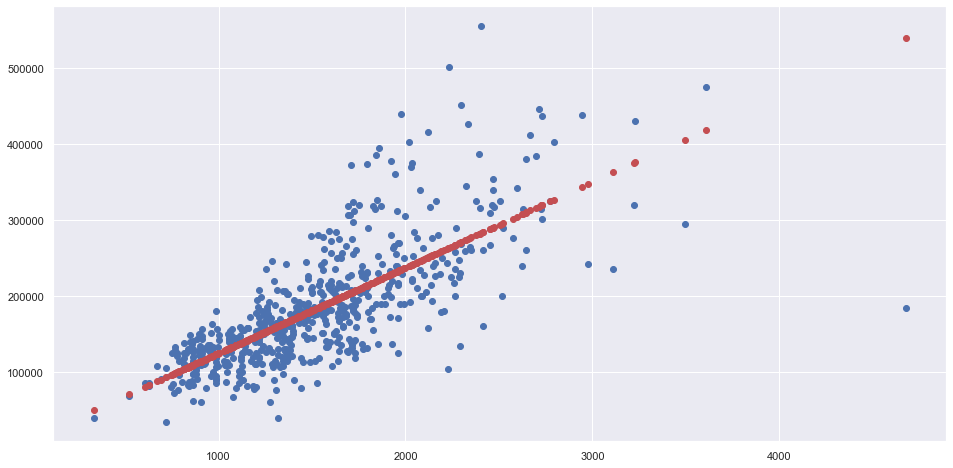

In [52]:
predicted_sales = linreg.predict(GrLivArea_Train)
#prediction

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_Train, SalePrice_Train)
plt.scatter(GrLivArea_Train, predicted_sales, color = "r")
plt.show()

In [53]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_Train, SalePrice_Train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_Train, predicted_sales)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#R^2 close to 0.5, neither good or bad

Explained Variance (R^2) 	: 0.5447975881778702
Mean Squared Error (MSE) 	: 2804222355.4659543
Root Mean Squared Error (RMSE) 	: 52954.90870038352


In [ ]:
#question 2

In [56]:
TotalBsmtSF = pd.DataFrame(data['TotalBsmtSF'])  # Response
GarageArea = pd.DataFrame(data['GarageArea'])        # Predictor

In [57]:
# Train Set : 600 samples
GarageArea_Train = pd.DataFrame(GarageArea[:600])
TotalBsmtSF_Train = pd.DataFrame(TotalBsmtSF[:600])

# Test Set : 200 samples
GarageArea_Test = pd.DataFrame(GarageArea[-200:])
TotalBsmtSF_Test = pd.DataFrame(TotalBsmtSF[-200:])

# Check the sample sizes
print("Train Set :", TotalBsmtSF_Test.shape, SalePrice_Train.shape)
print("Test Set  :", TotalBsmtSF_Train.shape, SalePrice_Test.shape)
###
print("Train Set :", GarageArea_Train.shape, SalePrice_Train.shape)
print("Test Set  :", GarageArea_Test.shape, SalePrice_Test.shape)

Train Set : (200, 1) (600, 1)
Test Set  : (600, 1) (200, 1)
Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [58]:
linreg.fit(GarageArea_Train, SalePrice_Train)

LinearRegression()

In [59]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [64779.28454314]
Coefficients 	: a =  [[251.90207237]]


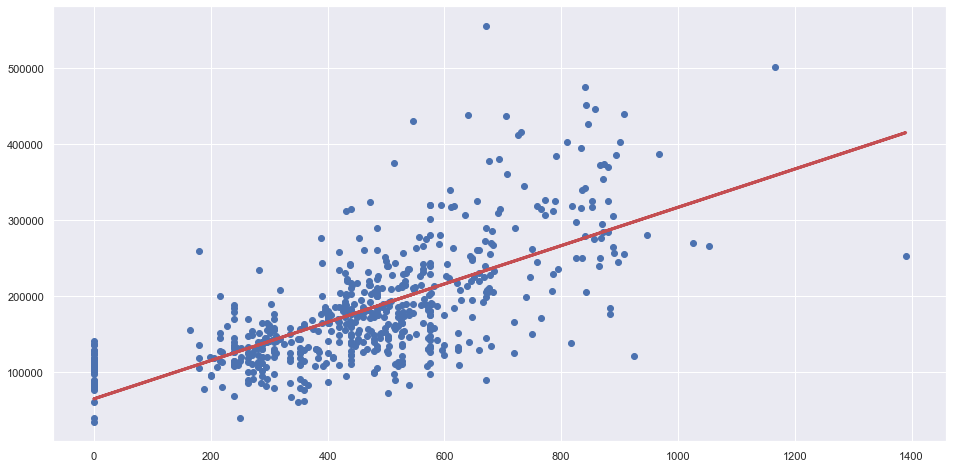

In [61]:
regline_x = GarageArea_Train
regline_y = linreg.intercept_ + linreg.coef_ * GarageArea_Train #GrLivArea_Train is coefficient

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_Train, SalePrice_Train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()


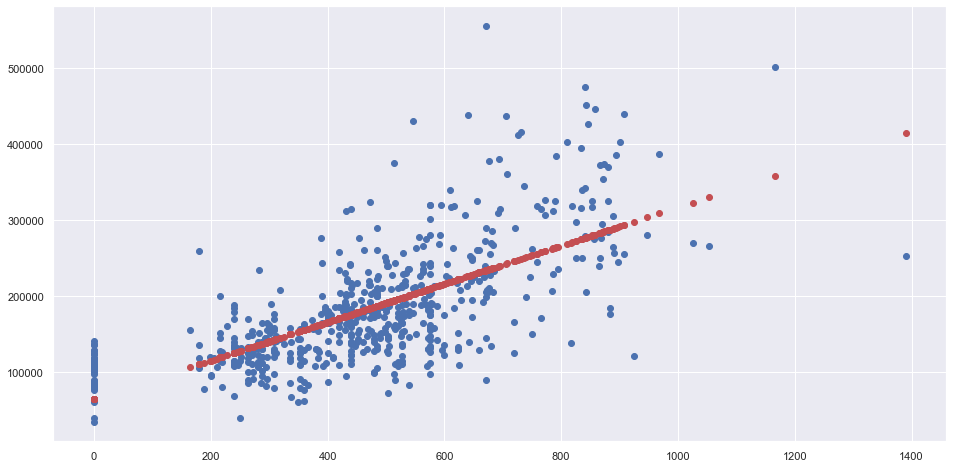

In [62]:
predicted_sales = linreg.predict(GarageArea_Train)
#prediction

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_Train, SalePrice_Train)
plt.scatter(GarageArea_Train, predicted_sales, color = "r")
plt.show()

In [ ]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(GarageArea_Train, SalePrice_Train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_Train, predicted_sales)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#R^2 close to 0.5, neither good or bad